In [113]:
from astropy.io import fits
import numpy as np
from astropy.table import Table
#import sys
#sys.path.append('/Users/rociokiman/Documents/Gaia-Cupid/ActivityAgeRelation/banyan_sigma')
#from banyan_sigma import banyan_sigma
import matplotlib.pyplot as plt
from astropy.coordinates import SkyCoord  
import astropy.units as u
#import random
%matplotlib notebook

In [2]:
literature_search = Table.read('Catalogs/literature_search.fits')
source_ref = Table.read('Catalogs/source_ref.csv')

In [3]:
#Numbers for each reference
source_num_ref = source_ref['source_num']

In [4]:
ra = np.array(literature_search['ra'])
dec = np.array(literature_search['dec'])
ewha = np.array(literature_search['ewha'])
source = np.array(literature_search['source_ref'])
source_num = np.array(literature_search['source_num'])

In [5]:
#Define number id that helps identify each star
extra_id = np.arange(len(literature_search['ra']))
#Sort according to ra
idx_sorted = np.argsort(literature_search['ra'])
ra_sorted = np.array(literature_search['ra'][idx_sorted])
dec_sorted = np.array(literature_search['dec'][idx_sorted])
#index to sent arrays to original state
idx = np.argsort(extra_id[idx_sorted])

In [6]:
#Defines an array that is going to indicate which stars are the same. 
#Having the same number in same_star_sorted means they are the same star.
same_star_sorted = np.zeros(len(ra_sorted))
dummy = 1
for i in range(len(ra_sorted)-1):
    c1 = SkyCoord(ra=ra_sorted[i]*u.deg, dec=dec_sorted[i]*u.deg)
    c2 = SkyCoord(ra=ra_sorted[i+1]*u.deg, dec=dec_sorted[i+1]*u.deg)
    separation = c1.separation(c2).arcsec
    if(separation < 2):
        same_star_sorted[i] = dummy
        same_star_sorted[i+1] = dummy
    else:
        dummy +=1

same_star = same_star_sorted[idx]

In [7]:
N_ref = len(source_num_ref)
matrix_prob = np.ones((N_ref,N_ref))*np.nan

In [8]:
matrix_prob[1,0] = 1

In [9]:
matrix_prob

array([[nan, nan, nan, ..., nan, nan, nan],
       [ 1., nan, nan, ..., nan, nan, nan],
       [nan, nan, nan, ..., nan, nan, nan],
       ...,
       [nan, nan, nan, ..., nan, nan, nan],
       [nan, nan, nan, ..., nan, nan, nan],
       [nan, nan, nan, ..., nan, nan, nan]])

In [118]:
howmany = []
mean,std,delta=[],[],[]
for x in range(1,int(max(same_star_sorted))):
    mask = (same_star == x) * (ewha>0)
    if(len(ewha[mask*~np.isnan(ewha)])>1):
        ### --- Test for the selection of equal stars --- ### 
        #if(20 in source_num[mask]):
        #    print(x)
        #    for ra_i,dec_i,source_i in zip(ra[mask],dec[mask],source[mask]):
        #        print(ra_i,dec_i,source_i)
        ### --- --- ###
        
        howmany.append(len(ewha[mask]))
        mean.append(np.nanmean(ewha[mask]))
        std.append(np.nanstd(ewha[mask]))
        delta.append(np.nanmax(ewha[mask])-np.nanmin(ewha[mask]))
        
        if(np.nanstd(ewha[mask])/np.nanmean(ewha[mask])>0.3):
            print(ewha[mask])
        
mean,std,delta = np.array(mean),np.array(std),np.array(delta)

/Users/rociokiman/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:4: RuntimeWarning: invalid value encountered in greater
  after removing the cwd from sys.path.


[1.30999994 0.93       2.5        3.55900002]
[1.94000006 5.1        3.57999992 2.79999995]
[0.029      0.70999998]
[2.62242079 0.69216883]
[9.97999954 3.01       6.4        6.40999985]
[1.12 2.6 ]
[1.5  0.25]
[0.36700001 0.02      ]
[92.7 34.1]
[0.34       0.66500002 0.23      ]
[0.51999998 1.10000002]
[0.026 0.081]
[4.61000013 2.94       6.56500006]
[3.29      7.4       7.4000001]
[0.063      0.60000002]
[1.35000002 1.72800004 0.99000001 0.52       0.99      ]
[2.52999997 1.89999998 4.78000021 2.54       1.9        4.78000021
 2.46000004 4.78000021]
[0.063 0.022]
[0.116 1.   ]
[1.38999999 2.49       1.4        2.9       ]
[0.06       0.33700001]
[0.27 0.8 ]
[0.039      0.36000001]
[1.30200005 0.21       1.9        0.89999998]
[0.029      0.40000001]
[0.07 1.  ]
[5.1        2.51999998]
[1.42999995 1.5        3.         2.56999993]
[0.25999999 0.21       0.80000001 0.8       ]
[ 7.8039999  10.3         8.2        15.3         5.36000013  4.9       ]
[0.39 1.8 ]
[3.75999999 0.54000002 4

[8.53638077 2.21201921]
[4.15726757 1.91402054]
[2.1 5.1]
[7.21000004 6.19999981 2.76       4.53200006 4.36000013]
[2.8499999  1.54999995 1.55       1.55      ]
[0.18799999 0.41      ]
[0.49000001 4.9        4.30999994]
[ 3.5         2.24399996  4.7        10.81000042]
[0.11 0.03]
[0.029 0.62 ]
[14.2        7.4000001]
[0.93000001 2.4        1.32       2.5999999  1.8        2.5999999 ]
[7.5999999 3.65     ]
[0.46599999 0.23      ]
[0.237 0.1  ]
[1.34000003 0.68      ]
[2.1        0.93000001]
[0.168      0.41999999]
[0.56599998 0.22      ]
[0.049      0.47999999]
[0.14 0.05]
[0.28 1.3 ]
[13.6         7.5         7.5         4.80000019]
[1.70000005 0.23      ]
[0.33000001 0.42       1.4       ]
[1.46000004 1.5        3.0999999  3.1        2.30999994]
[0.97000003 1.30999994 1.76999998 0.73       0.73      ]
[ 7.08371305 16.79470253]
[0.85299999 0.50999999 0.08      ]
[3.25064397 0.14041167]
[1.47000003 0.43900001 0.2        0.47       0.94      ]
[2.50999999 1.8        3.08599997 4.2      

<IPython.core.display.Javascript object>


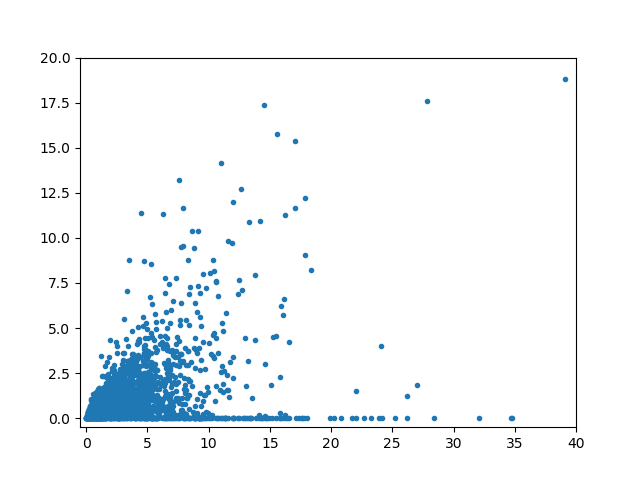

(-0.5, 20)

In [124]:
plt.plot(mean,delta,'.')
plt.xlim(-0.5,40)
plt.ylim(-0.5,20)

<IPython.core.display.Javascript object>


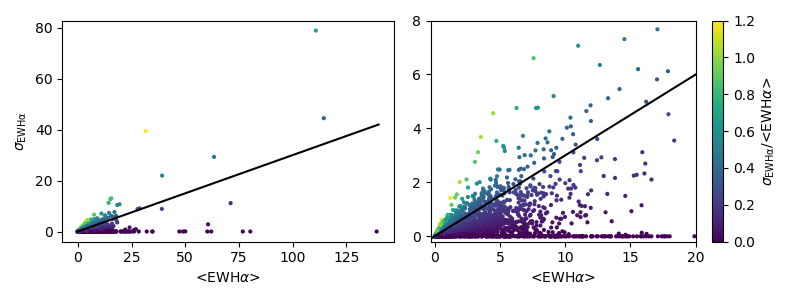

In [117]:
x = np.linspace(-0.2,140)
y = x*0.3
f,(ax1,ax2) = plt.subplots(1,2,figsize=(8,3)) 
cax = ax1.scatter(mean,std,c=std/mean,s=4,vmin=0,vmax=1.2)
ax1.plot(x,y,'-k')
ax1.set_xlabel(r'<EWH$\alpha$>')
ax1.set_ylabel(r'$\sigma_{\rm EWH\alpha}$')

ax2.scatter(mean,std,c=std/mean,s=4,vmin=0,vmax=1.2)
ax2.plot(x,y,'-k')
ax2.set_xlim(-0.3,20)
ax2.set_ylim(-0.2,8)
ax2.set_xlabel(r'<EWH$\alpha$>')

plt.colorbar(cax,label=r'$\sigma_{\rm EWH\alpha}$/<EWH$\alpha$>')
plt.tight_layout()
plt.show()

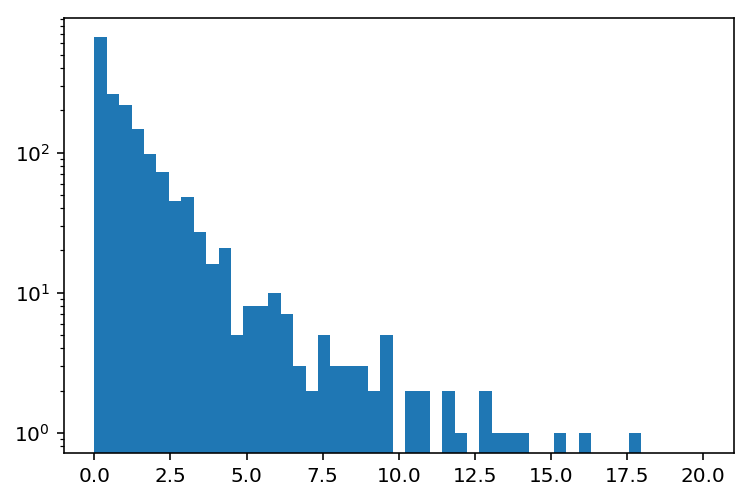

In [41]:
plt.hist(std/mean,bins=np.linspace(0,20))
plt.yscale('log')
plt.show()